In [29]:

# In[0]: IMPORTS, SETTINGS
#region
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required
import sklearn
assert sklearn.__version__ >= "0.20" # Scikit-Learn ≥0.20 is required
import numpy as np
import os   
np.random.seed(42) # to output the same result across runs
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)       
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd") # Ignore useless warnings (see SciPy issue #5998)
font_size = 14
let_plot = True
#endregion


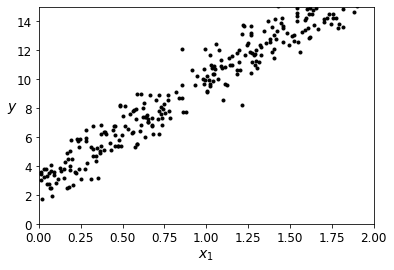

In [30]:
n_samples = 300
X = 2*np.random.rand(n_samples, 1) # random real numbers in [0,2]
y_no_noise = 3 + 7*X; 
y = y_no_noise + np.random.randn(n_samples, 1) # noise: random real numbers with Gaussian distribution of mean 0, variance 1

let_plot = True
if let_plot:
    plt.plot(X, y, "k.")
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    plt.axis([0, 2, 0, 15])
    plt.savefig("generated_data_plot",format='png', dpi=300)
    plt.show()


In [31]:
X_add_x0 = np.c_[np.ones((n_samples, 1)), X]  # add x0 = 1 to each instance
theta_norm_eq = np.linalg.inv(X_add_x0.T @ X_add_x0) @ X_add_x0.T @ y 
# Note: Theta is a bit different from the true parameters due to the noise.

In [32]:
# 1.3. Try prediction 
X_test = np.array([[0], [2], [15], [24], [30]]) # 3 instances
X_test_add_x0 = np.c_[np.ones((len(X_test), 1)), X_test]  # add x0 = 1 to each instance
y_predict = X_test_add_x0 @ theta_norm_eq


In [25]:
y_predict

array([[  4.14421295],
       [ 15.94850643],
       [ 92.67641405],
       [145.79573471],
       [181.20861515]])

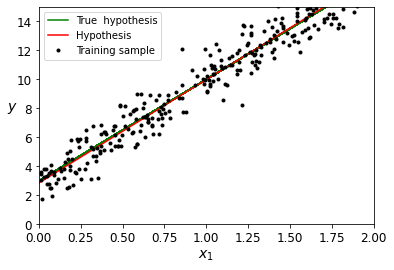

In [33]:
if let_plot:
    plt.plot(X, y_no_noise, "g-",label="True  hypothesis")
    plt.plot(X_test, y_predict, "r-",label='Hypothesis')
    plt.plot(X, y, "k.",label='Training sample')
    plt.axis([0, 2, 0, 15])
    plt.legend()    
    plt.xlabel("$x_1$", fontsize=font_size)
    plt.ylabel("$y$", rotation=0, fontsize=font_size)
    plt.show()	

In [34]:
data = []
eta = 0.1  # learning rate
m = len(X)
np.random.seed(42);
theta_random_init = np.random.randn(2,1)
theta = theta_random_init  # random initialization
#for iteration in range(1,1000) # use this if you want to stop after some no. of iterations, eg. 1000
while True:
	#gradients = 2/m * X_add_x0.T @ (X_add_x0 @ theta - y); # WARNING: @ (mat multiply) causes weird indent errors when running in Debug interactive
	gradients = (2/m) * X_add_x0.T .dot (X_add_x0 .dot (theta) - y); # works the same at the code above, but no indent errors
	
	theta = theta - eta*gradients
	data.append([gradients, theta])
	#print(np.abs(np.mean(eta*gradients)))
	if (np.abs(np.mean(eta*gradients)) < 0.000000001): 
		break # stop when the change of theta is small

# 2.3. Compare with theta by Normal Eq.
theta_norm_eq
theta_BGD = theta

print(data)


[[array([[-19.11775026],
       [-23.95594723]]), array([[2.40848918],
       [2.25733042]])], [array([[-10.54896211],
       [-13.81451046]]), array([[3.46338539],
       [3.63878147]])], [array([[-5.70276604],
       [-8.06051382]]), array([[4.03366199],
       [4.44483285]])], [array([[-2.96557143],
       [-4.7927665 ]]), array([[4.33021914],
       [4.9241095 ]])], [array([[-1.42309714],
       [-2.9340108 ]]), array([[4.47252885],
       [5.21751058]])], [array([[-0.55730345],
       [-1.87384502]]), array([[4.5282592 ],
       [5.40489508]])], [array([[-0.07466809],
       [-1.26639696]]), array([[4.53572601],
       [5.53153478]])], [array([[ 0.19111576],
       [-0.91568194]]), array([[4.51661443],
       [5.62310297]])], [array([[ 0.33427258],
       [-0.7106446 ]]), array([[4.48318717],
       [5.69416743]])], [array([[ 0.40818385],
       [-0.58835225]]), array([[4.44236879],
       [5.75300266]])], [array([[ 0.44308897],
       [-0.51313966]]), array([[4.39805989],
       

In [23]:
count = 0
for i in data:
  count += 1
print(count)

474


In [35]:
theta_norm_eq

array([[2.85592071],
       [7.13112353]])

In [36]:
theta_BGD 

array([[2.8559211],
       [7.1311232]])